In [1]:
# usage: $python3 CULane_Remake.py [--no-vis]
# [--no-vis] for not showing frame, stopping after each frame

## Imports

In [2]:
#from shutil import copy
#from shutil import copyfile
import os
import sys
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from os import walk
#import IPython
#IPython.embed() # to debug in notebook
#import random
print("Successfully imported all")

Successfully imported all


## Convert notebook to python file

In [3]:
#!jupyter nbconvert --to script CULane_Remake.ipynb
# Can use the command line argument instead:
#$jupyter nbconvert --to script CULane_Remake.ipynb

## Print pretty with colors

In [4]:
# Credit: https://stackoverflow.com/questions/287871/print-in-terminal-with-colors
class CMD_C:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'   # End formatting
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

## Helper functions

### Parse Command Args, other setup


In [5]:
display_results = False if sys.argv[-1] == "--no-vis" else True
print("Display results? = ", display_results)

Display results? =  True


In [6]:
cwd = os.getcwd()
print("CWD: ", cwd)

CWD:  /root/atlas_root/home/cjcramer/lane_lines/Scripts


## Gather all images in the folders

In [7]:
# Folders of annotations
folder_dir = "/root/atlas_root/teams/team-1/Datasets/CULane_Dataset_RGB/laneseg_label_w16/"
annotation_paths = []
# Credit: https://www.mkyong.com/python/python-how-to-list-all-files-in-a-directory/
for r, d, files in os.walk(folder_dir):
    for file in files:
        annotation_paths.append(os.path.join(r, file))

print("Number of annotations total: ", CMD_C.OKBLUE, len(annotation_paths), CMD_C.ENDC, sep="")

Number of annotations total: 98877


## Main loop

Processing image 0 / 98877 : read [[5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 ...
 [5 5 5 ... 4 4 4]
 [5 5 5 ... 4 4 4]
 [5 5 5 ... 5 5 5]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0   0   0]]


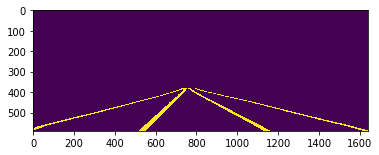

In [13]:
r_ind = 43456  # A random curvy section

for i, annotation_path in enumerate(annotation_paths):
    print("Processing image ", CMD_C.OKGREEN, i, CMD_C.ENDC, " / ", len(annotation_paths), " : ", sep="", end="")

    # Read image
    img = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)
    print("read ", sep="", end="")

    # Convert black pixels to grayscale of 5
    #img[img == 0] = 5
    # Convert all lanes to white
    #print(img)
    img[img == 5] = 0    # Convert black pixels back to 0 (they were 5 before)
    #print(img)
    img[img != 0] = 255
    #print(img)
    #plt.imshow(img)
    #break
    
    # Save new image (as PNG)
    save_success = cv2.imwrite(annotation_path, cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    if save_success:
        print("saved to ", annotation_path, sep="")    # Replace old image
    else:
        print(CMD_C.FAIL, "FAILED TO SAVE IMAGE", CMD_C.ENDC, annotation_path)
        break

In [ ]:
print("All done!")